# getting started
install SNT on your FIJI instance, then install pyimagej. <br> See details here: https://github.com/morphonets/SNT/tree/master/notebooks

import pyimagej <br>
define fiji_path, where your fiji instance can be found (with installed SNT) <br>
define jsonfolder, where the reconstructions are in .json format (use the ccf2 version since SNT is not compatible with ccf3 as of yet)

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import imagej
fiji_path = r"C:\Users\bakaj\Downloads\instal\fiji-new\Fiji.app" # EDIT THIS LINE 
jsonfolder = r"C:\Users\bakaj\Desktop\MouseLight\all_cells_json\unsorted" # EDIT THIS LINE

try:
    if os.path.isdir(fiji_path):
        ij = imagej.init(fiji_path, headless=False)
    else:
        print("Cannot proceed: Fiji not found!")
except:
    print('imagej already imported..?')

from scyjava import jimport

AllenUtils = jimport('sc.fiji.snt.annotation.AllenUtils')
AllenCompartment = jimport('sc.fiji.snt.annotation.AllenCompartment')
sntrgbcolor = jimport('org.scijava.util.ColorRGB')

The following three functions do all the work, initializes a new viewer, then adds cells and brain regions one by one to the viewer

In [2]:
def init_viewer():
    #initializes an SNT viewer in dark mode, adds a mouse brain
    Viewer3D = jimport('sc.fiji.snt.viewer.Viewer3D')
    viewer_3d = Viewer3D(True)#
    viewer_3d.setEnableDarkMode(True)
    viewer_3d.loadRefBrain('mouse')
    #viewer_3d.setViewMode('sagittal')
    viewer_3d.setAnimationEnabled(True)
    viewer_3d.setDefaultThickness(1.5)
    viewer_3d.show()
    return viewer_3d


def add_cell_to_viewer(viewer_3d,
                       cell_name = 'AA0922',
                       cells_added = {},
                       axon_color= 'red',
                       dendrite_color = 'blue',
                       show_axon = True,
                       show_dendrite = True,
                       all_cells_on_left = True):
    # this function adds a single cell to a previously spawned viewer
    #the cells_added variable is just a means to keep track of added cells, if a cell is already in the list,
    #it will be deleted instead
    # You can specify dendrite and axon color, and can assign cells to the left hemisphere

    if cell_name in cells_added.keys():
        try:
            viewer_3d.remove(cells_added[cell_name][0])
        except:
            pass
        try:
            viewer_3d.remove(cells_added[cell_name][1])
        except:
            pass
        del cells_added[cell_name]
    else:
        Tree = jimport('sc.fiji.snt.Tree') 
        
        jsonfile_with_path = os.path.join(jsonfolder,cell_name+'.json')
        if show_axon:
            axon = Tree(jsonfile_with_path, "axon")
            axon.setColor(axon_color)
            axon.setLabel(axon.getLabel()+' axon')
            axon.setRadii(8)
        else:
            axon=None
        dendrite = Tree(jsonfile_with_path, "dendrite")
        dendrite.setLabel(dendrite.getLabel()+' dendrite')
        dendrite.setColor(dendrite_color)
        
        if not AllenUtils.isLeftHemisphere(dendrite) and all_cells_on_left:
                AllenUtils.assignToLeftHemisphere(axon)
                AllenUtils.assignToLeftHemisphere(dendrite)
        if show_axon:
            viewer_3d.add(axon)
        if show_dendrite:
            viewer_3d.add(dendrite)
        cells_added[cell_name] = [axon,dendrite]
    return cells_added#{cell_name:[axon,dendrite]}

def add_brain_region_to_viewer(structureId,color,transparency,viewer_3d):
    #this function adds brain regions based on their structure ID
    #color is set with a list of RGB values e.g [255,255,255]
    #transparency is 0 (transparent) to 1 (solid)
    #viewer has to be initialized
    allenmesh = AllenCompartment(structureId).getMesh()
    allenmesh.setColor(sntrgbcolor(color[0],color[1],color[2]),transparency) # color, transparency
    viewer_3d.addMesh(allenmesh)

initialize a new viewer,a  new window should appear with a mouse brain

In [3]:
viewer_3d = init_viewer()
cells_added = {}

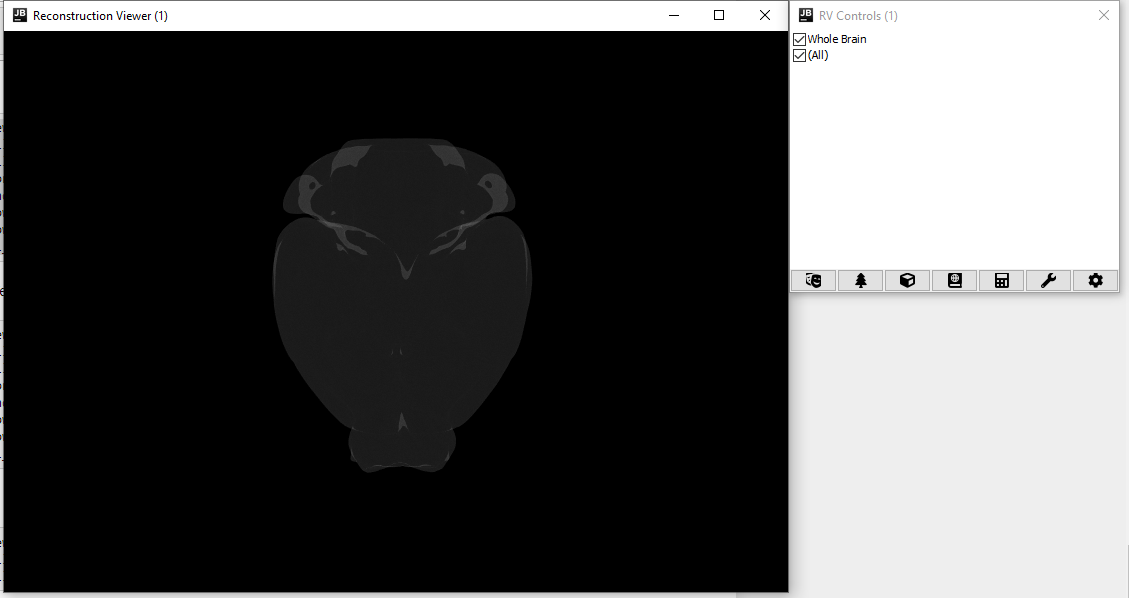

Add a cell:

In [4]:
cells_added = add_cell_to_viewer(viewer_3d,
                                 cell_name = 'AA0922',
                                 cells_added = cells_added,
                                 axon_color= 'red',
                                 dendrite_color = 'blue',
                                 show_axon = True,
                                 show_dendrite = True,
                                 all_cells_on_left = False)

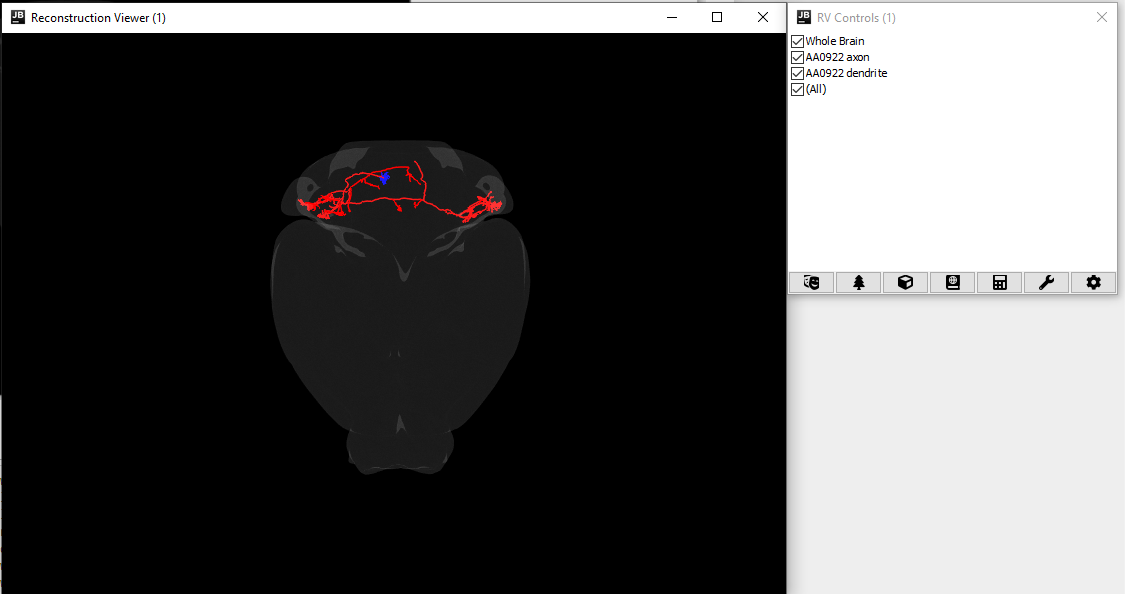

Add another cell to the same viewer with different colors

In [5]:
cells_added = add_cell_to_viewer(viewer_3d,
                                 cell_name = 'AA0920',
                                 cells_added = cells_added,
                                 axon_color= 'green',
                                 dendrite_color = 'yellow',
                                 show_axon = True,
                                 show_dendrite = True,
                                 all_cells_on_left = False)

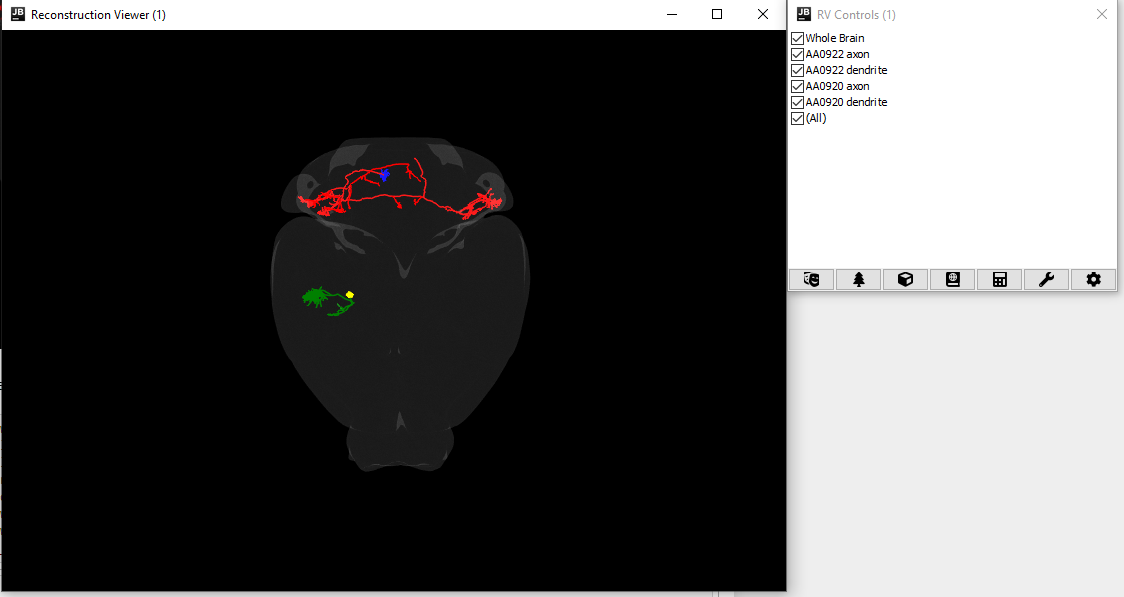

Let's remove the first cell

In [6]:
cells_added = add_cell_to_viewer(viewer_3d,
                                 cell_name = 'AA0922',
                                 cells_added = cells_added)

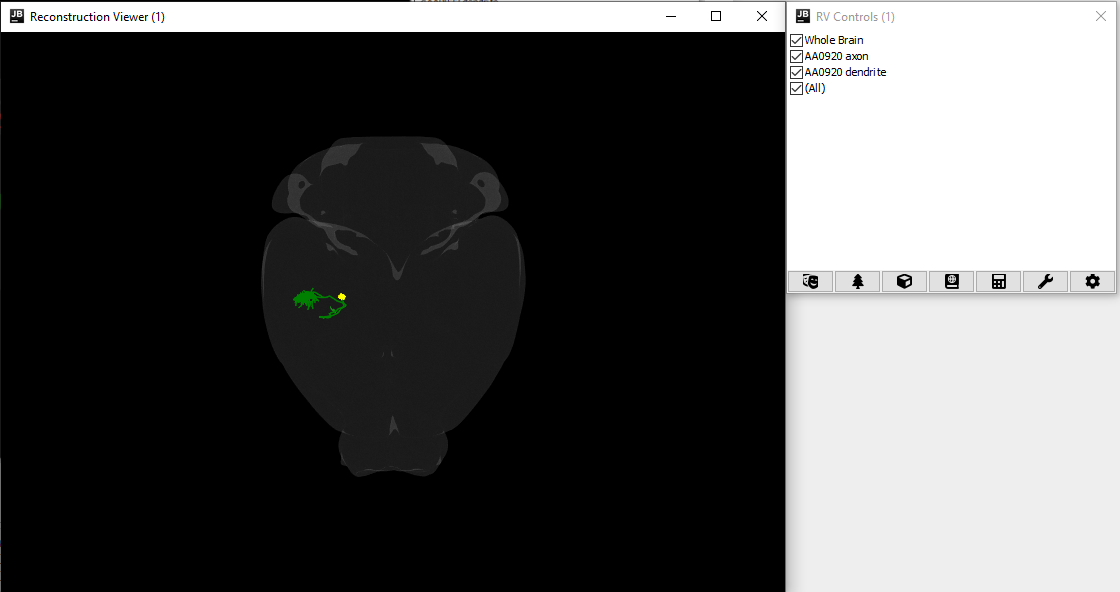

now let's figure out the soma location of the second cell

In [7]:
Tree = jimport('sc.fiji.snt.Tree')
jsonfile_with_path = os.path.join(jsonfolder,'AA0920.json')
axon = Tree(jsonfile_with_path, "axon")
structureId = axon.getRoot().getAnnotation().id()

add this brain region to the viewer with a custom color

In [8]:
add_brain_region_to_viewer(structureId,[86, 101, 115],.5,viewer_3d)

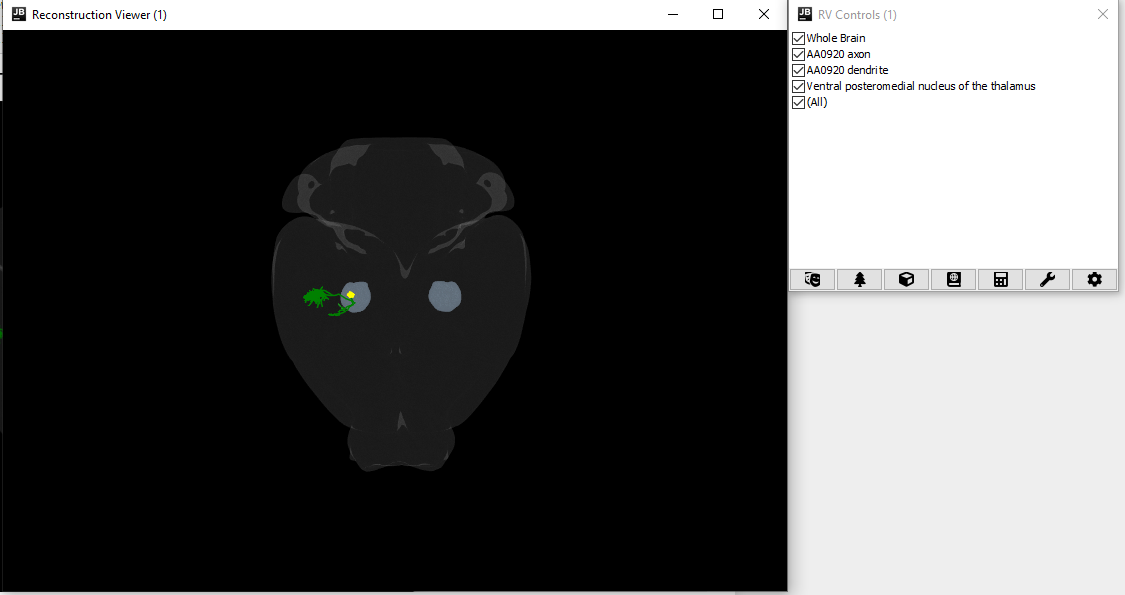